# Wilson and Cowan Model

## No Drive

Generate the NeuroML/LEMS file with the Wilson and Cowan definition

In [1]:
# need to move to NeuroML directory in order to do run the python script
% cd ../NeuroML2
! python GenerateWilsonCowanLEMS.py -ie0 0 -ii0 0

/home/padraig/git/WilsonCowan/NeuroML2
pyNeuroML >>> Written LEMS Simulation LEMS_WC_slowSim.xml to file: LEMS_WC_slowSim.xml


Run pynml to simulate the defined LEMS

pyNeuroML >>> Reloading data specified in LEMS file: LEMS_WC_slowSim.xml (/home/padraig/git/WilsonCowan/NeuroML2/LEMS_WC_slowSim.xml), base_dir: ., cwd: /home/padraig/git/WilsonCowan/NeuroML2
pyNeuroML >>> Reloading: Data loaded from ./WC_slow.dat (jNeuroML)


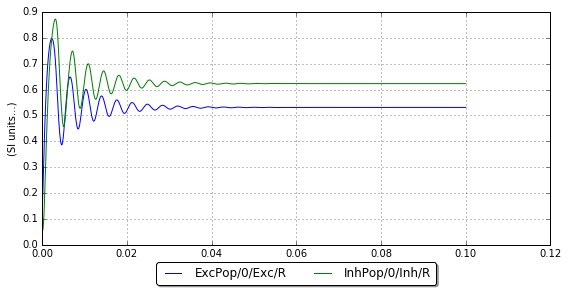

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

low_lems_file='LEMS_WC_slowSim.xml'
low_results = pynml.run_lems_with_jneuroml(low_lems_file, nogui=True, load_saved_data=True, plot=True)

## Driven 

In [3]:
# Run driven simulation
! python GenerateWilsonCowanLEMS.py -ie0 0.5 -ii0 0.5

pyNeuroML >>> Written LEMS Simulation LEMS_WC_drivenSim.xml to file: LEMS_WC_drivenSim.xml


pyNeuroML >>> Reloading data specified in LEMS file: LEMS_WC_drivenSim.xml (/home/padraig/git/WilsonCowan/NeuroML2/LEMS_WC_drivenSim.xml), base_dir: ., cwd: /home/padraig/git/WilsonCowan/NeuroML2
pyNeuroML >>> Reloading: Data loaded from ./WC_driven.dat (jNeuroML)


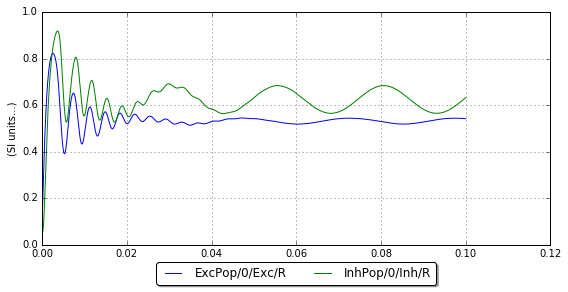

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

low_lems_file='LEMS_WC_drivenSim.xml'
low_results = pynml.run_lems_with_jneuroml(low_lems_file, nogui=True, load_saved_data=True, plot=True)